In [17]:
import pyodbc
import pandas as pd
from sqlalchemy import create_engine

# Define the connection details
server = 'AHMEDMOHSEN'
database = 'Ecommerce_Sales'
username = 'sa'  # Double backslash to escape
password = '11223344'

# Create the connection string for SQLAlchemy
connection_string = f'mssql+pyodbc://{username}:{password}@{server}/{database}?driver=SQL+Server'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Test the connection by listing tables
tables = pd.read_sql("SELECT TABLE_NAME FROM INFORMATION_SCHEMA.TABLES", engine)
print( pd.DataFrame(tables))


     TABLE_NAME
0     Customers
1      Products
2  Sales_Amount
3   sysdiagrams
4     Locations
5        Orders
6         Sales
7       Surveys


In [18]:
import matplotlib.pyplot as plt


In [19]:
# Load the Sales table into a DataFrame
sales_df = pd.read_sql("SELECT * FROM [Ecommerce_Sales].[dbo].[Sales]", engine)
customers_df = pd.read_sql("SELECT * FROM [Ecommerce_Sales].[dbo].[Customers]", engine)
locations_df = pd.read_sql("SELECT * FROM [Ecommerce_Sales].[dbo].[Locations]", engine)
orders_df = pd.read_sql("SELECT * FROM [Ecommerce_Sales].[dbo].[Orders]", engine)
products_df = pd.read_sql("SELECT * FROM [Ecommerce_Sales].[dbo].[Products]", engine)
Surveys_df=pd.read_sql("SELECT * FROM [Ecommerce_Sales].[dbo].[Surveys]", engine)

In [20]:
#Rating of Products
# Average rating of products
product_ratings = products_df.groupby('Product_Type')['Rating'].mean()
print(product_ratings)

Product_Type
Headphones    1.000000
Laptop        3.666667
Smartphone    3.750000
Smartwatch    3.000000
Tablet        3.000000
Name: Rating, dtype: float64


In [5]:
# Age Categorization & Sales:
merged_df = pd.merge(customers_df, sales_df, on='Customer_ID')
age_purchase = merged_df.groupby('Age')['Product_ID'].count()
print(age_purchase)

Age
18.0     3
19.0    20
20.0    19
21.0    13
22.0    17
        ..
76.0    12
77.0    26
78.0    13
79.0    10
80.0    18
Name: Product_ID, Length: 63, dtype: int64


In [6]:
#Loyalty Members Analysis:
loyalty_counts = customers_df['Loyalty_Member'].value_counts()
print(loyalty_counts)

Loyalty_Member
No     422
Yes    117
Name: count, dtype: int64


In [7]:
# Countries Purchase Analysis:

orders_with_locations = pd.merge(orders_df, locations_df, on='Location_ID')
country_purchases = orders_with_locations.groupby('Country')['Order_ID'].count()
print(country_purchases)

Country
Egypt     2767
France    2010
India     2074
USA       4468
Name: Order_ID, dtype: int64


In [8]:
#. Shipping Type Analysis:

shipping_type_analysis = orders_df['Shipping_Type'].value_counts()
print(shipping_type_analysis)

Shipping_Type
Standard     3794
Express      2524
Overnight    2485
Expedited    1281
Same Day     1235
Name: count, dtype: int64


In [9]:
#Companies Distribution of sales products:
merge_df = pd.merge(products_df, sales_df, on='Product_ID')
age_purchase = merged_df.groupby(products_df['Product_Type'])['Quantity'].sum()
print(age_purchase)

Product_Type
Headphones     4.0
Laptop        20.0
Smartphone    30.0
Smartwatch     2.0
Tablet         3.0
Name: Quantity, dtype: float64


In [10]:
# Group by 'Purchase_Date' and count the number of 'Order_ID'
time_series_orders = sales_df.groupby(sales_df['Purchase_Date'])['Order_ID'].count()

# Convert the result to a DataFrame
time_series_df = time_series_orders.reset_index()

# Rename columns for clarity
time_series_df.columns = ['Purchase_Date', 'Order_Count']

# Display the DataFrame
print(time_series_df)

    Purchase_Date  Order_Count
0      2023-09-24           30
1      2023-09-25           30
2      2023-09-26           24
3      2023-09-27           30
4      2023-09-28           24
..            ...          ...
361    2024-09-19           66
362    2024-09-20           55
363    2024-09-21           61
364    2024-09-22           69
365    2024-09-23           56

[366 rows x 2 columns]


In [13]:
gender_distribution = customers_df['Gender'].value_counts()
print(gender_distribution)

Gender
Male      282
Female    257
Name: count, dtype: int64


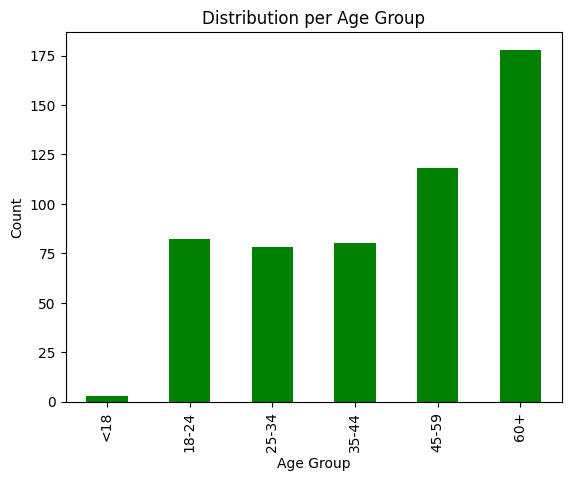

In [21]:
# 4. Categorization Per Age Group

bins = [0, 18, 25, 35, 45, 60, 100]
labels = ['<18', '18-24', '25-34', '35-44', '45-59', '60+']
customers_df['age_group'] = pd.cut(customers_df['Age'], bins=bins, labels=labels)

# Count the number of users per age group
age_group_distribution = customers_df['age_group'].value_counts(sort=False)

# Plotting
age_group_distribution.plot(kind='bar', color='green')
plt.title('Distribution per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()


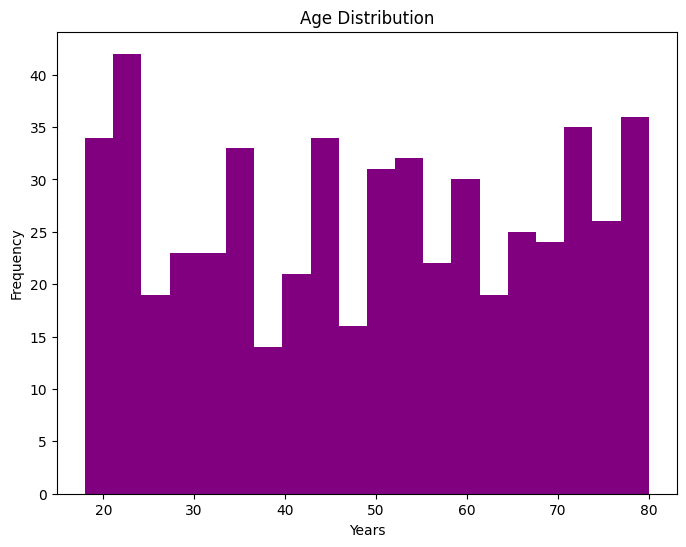

In [22]:
# 3. Age Distribution
plt.figure(figsize=(8,6))
customers_df['Age'].plot(kind='hist', bins=20, color='purple')
plt.title('Age Distribution')
plt.xlabel('Years')
plt.ylabel('Frequency')
plt.show()

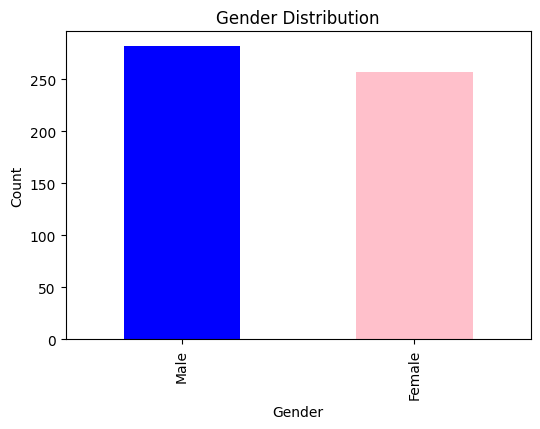

In [24]:
plt.figure(figsize=(6,4))
gender_distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Figure size 800x600 with 0 Axes>

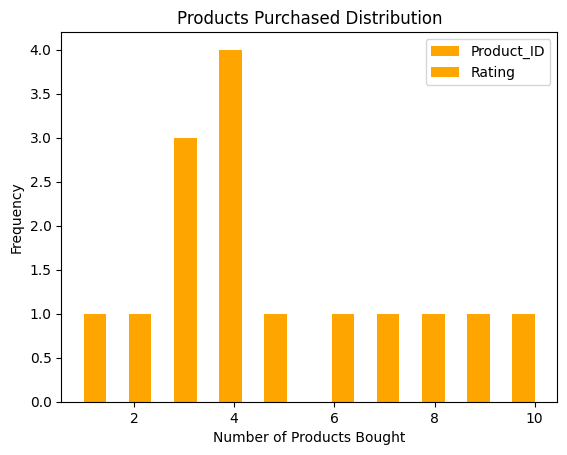

In [25]:
#5. Products Purchased Distribution
plt.figure(figsize=(8,6))
products_df.plot(kind='hist', bins=20, color='orange')
plt.title('Products Purchased Distribution')
plt.xlabel('Number of Products Bought')
plt.ylabel('Frequency')
plt.show()


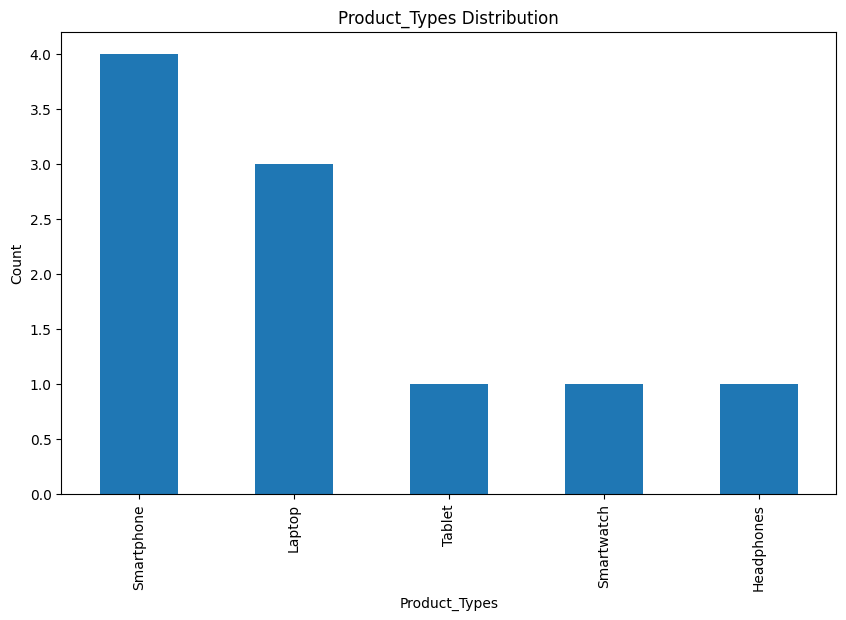

In [28]:
#6. Companies Distribution
Product_Type_distribution = products_df['Product_Type'].value_counts()

# Plotting
plt.figure(figsize=(10,6))
Product_Type_distribution.plot(kind='bar')
plt.title('Product_Types Distribution')
plt.xlabel('Product_Types')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()
